c:\Users\Admin\miniconda3\envs\hawkes\lib\site-packages\tick\dataset\download_helper.py:216: UserWarning: TICK_DATASETS environment variable was not set. Saving dataset to the default location ~\tick_datasets
  .format(_TICK_HOME_ENV, _TICK_DEFAULT_HOME))


(5.88 MB) [========================================] 100%


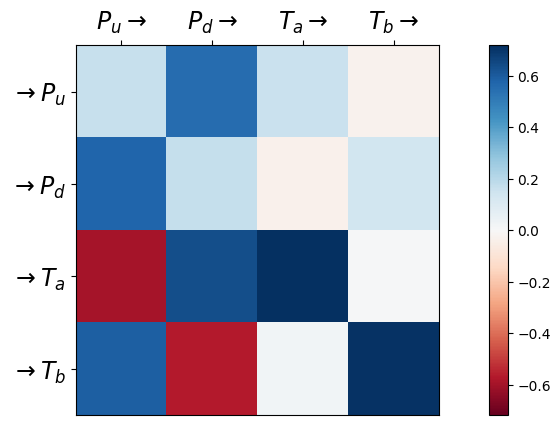

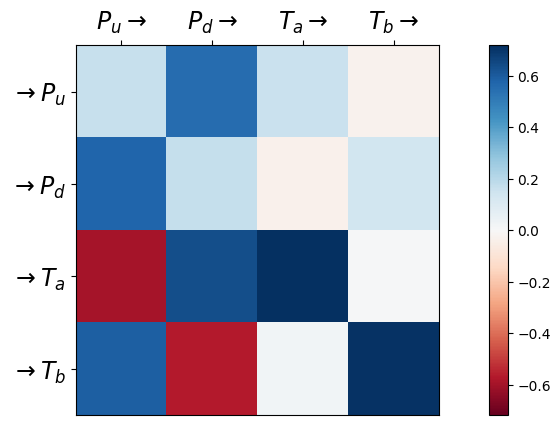

In [1]:
import numpy as np

from tick.dataset import fetch_hawkes_bund_data
from tick.hawkes import HawkesConditionalLaw
from tick.plot import plot_hawkes_kernel_norms

timestamps_list = fetch_hawkes_bund_data()

hawkes_learner = HawkesConditionalLaw(
    claw_method="log", delta_lag=0.1, min_lag=5e-4, max_lag=500,
    quad_method="log", n_quad=10, min_support=1e-4, max_support=1, n_threads=4)

hawkes_learner.fit(timestamps_list)

plot_hawkes_kernel_norms(hawkes_learner,
                         node_names=["P_u", "P_d", "T_a", "T_b"])


# Does timestamp lists need to be divided in periods?
Timestamps_lists is a list of list of np.array. It contains 20 days that contains 4 types of np.array. Now I try to understand what change if timestamps_list becomes a list of np.array, a list with 4 types of np.array

In [13]:
timestamps_list_offsetted = [
    [event_type_times + i*86400 for event_type_times in timestamp_list]
    for i, timestamp_list in enumerate(timestamps_list)
]

event_type_timestamps_map = {i:[] for i in range(4)}


for day_timestamp_list in timestamps_list_offsetted:
    for i, event_timestamp_list in enumerate(day_timestamp_list):
        event_type_timestamps_map[i].extend(event_timestamp_list)

timestamps_list = [np.array(event_type_timestamps_map[i]) for i in range(4)]
timestamps_list

[array([6.29010480e+01, 6.29313020e+01, 6.30539940e+01, ...,
        1.69181000e+06, 1.69181000e+06, 1.69183148e+06]),
 array([6.30503260e+01, 6.30506320e+01, 6.30536460e+01, ...,
        1.69182680e+06, 1.69183301e+06, 1.69184058e+06]),
 array([6.28910630e+01, 6.29976330e+01, 6.34054500e+01, ...,
        1.69184591e+06, 1.69192001e+06, 1.69197924e+06]),
 array([6.29532540e+01, 6.30494090e+01, 6.30497270e+01, ...,
        1.69197353e+06, 1.69198113e+06, 1.69199766e+06])]

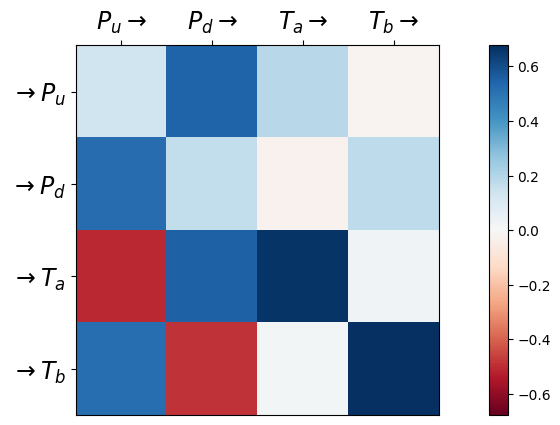

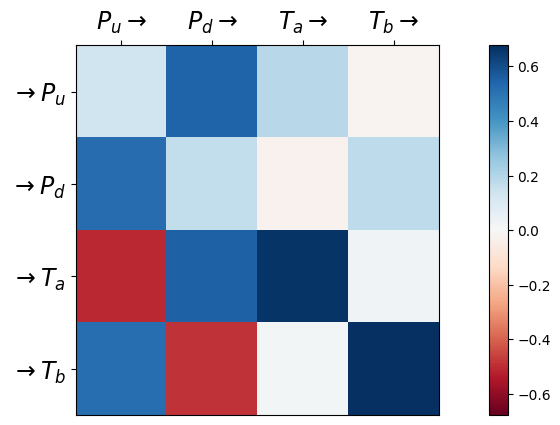

In [14]:
hawkes_learner.fit(timestamps_list)

plot_hawkes_kernel_norms(hawkes_learner,
                         node_names=["P_u", "P_d", "T_a", "T_b"])


OK it does not change anything